## Measure all cells' stability
Namely, try to find a stability value for each cell. Hopefully, every cell has a unique stable value which can be used as its "identity".   
Our assumption is that every cell has a unique mimimum resistance when measurement voltage is between 1.0-1.5.

In [1]:
CHIP = 2
CELL = 6
TIMES = 10

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
def gen_filename(voltage, time, cell = CELL, chip = CHIP):
#     return "/Users/lwh/CLionProjects/ce_device/test/data/stability_formal/" + str(chip) + "_" + str(cell) + "/" + str(time) + "/" + str(chip) + "_" + str(cell) + "_" + "%.1f" % voltage + ".csv"
    return str(chip) + "_" + str(cell) + "/" + str(time) + "/" + str(chip) + "_" + str(cell) + "_" + "%.1f" % voltage + ".csv"

In [12]:
from io import StringIO

def compute_resistence(vi, vo):
    return (vi - vo) * (2000 / vo)

def get_resistance(data):
    resistances = []
    for i in range(len(data[0])):
        if (data[1][i] == 0):
            continue
        resistances.append(compute_resistence(data[0][i], data[1][i]))
    if (len(resistances) < 5):
        return -1
    return sum(resistances) / len(resistances)

def is_tip_line(line):
    return line[0:4] == 'time'


def split_file(file):
    lines = open(file, 'r').readlines()
    str_cycles = []
    current_cycle = ""
    for line in lines:
        if (is_tip_line(line)):
            str_cycles.append(current_cycle)
            current_cycle = line
        else:
            current_cycle += line
    str_cycles.append(current_cycle)
    str_cycles = str_cycles[1:]
    cycles = []
    for str_cycle in str_cycles:
        csv = pd.read_csv(StringIO(str_cycle))
        cycles.append([list(csv['input']), list(csv['output'])])
    return cycles

def get_avg_resistance(filename):
    data_set = split_file(filename)
    rs = list(map(lambda data: get_resistance(data), data_set))
#     print("minimum is ", min(list(filter(lambda x: x > 0, rs))))
    return sum(rs) / len(rs)

def get_minimum(filename, pre_min):
    data_set = split_file(filename)
    rs = list(map(lambda data: get_resistance(data), data_set))
    rs_without_0 = list(filter(lambda x: x > 0, rs))
    if (len(rs_without_0) == 0):
        return 999999999
    new_min = min(rs_without_0)
    if (new_min < pre_min):
        return new_min
    else:
        return pre_min

minimum is  0  for cell  1
minimum is  506.553467453347  for cell  2
minimum is  1134.3971058644695  for cell  4
minimum is  771.9363405077164  for cell  5
minimum is  317.6507215018444  for cell  6
minimum is  440.913145526767  for cell  7
minimum is  0  for cell  8
minimum is  350.145268695742  for cell  9
minimum is  855.1387975486598  for cell  10
minimum is  0  for cell  11
minimum is  2398.3263770562  for cell  12
minimum is  724.1303792386026  for cell  13
minimum is  636.448837472869  for cell  14
minimum is  316.4745256144826  for cell  15
minimum is  864.5039738146849  for cell  16


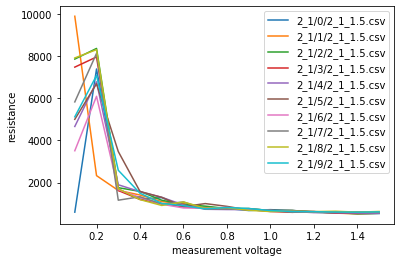

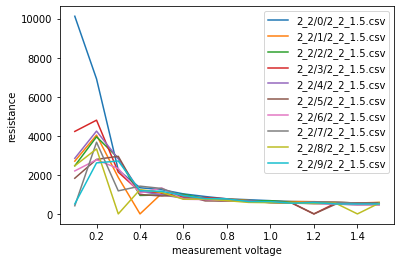

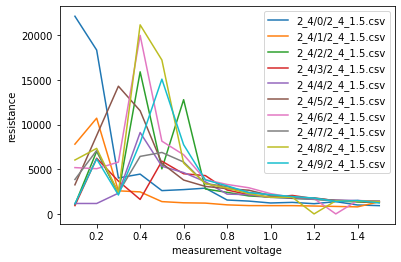

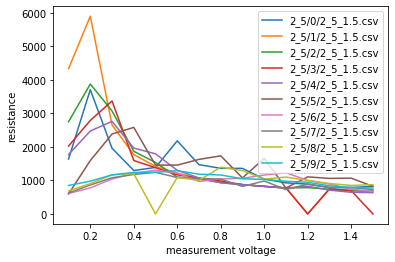

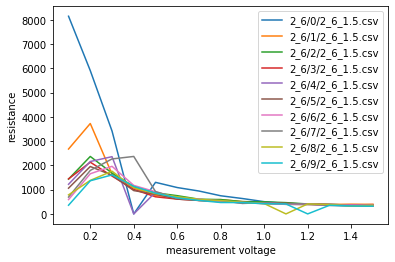

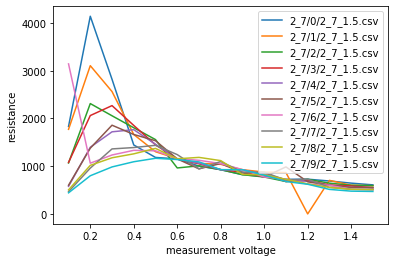

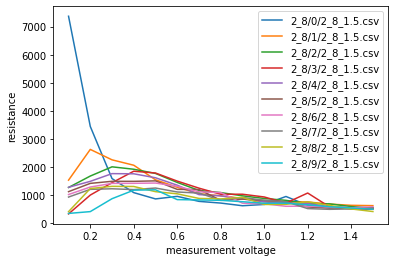

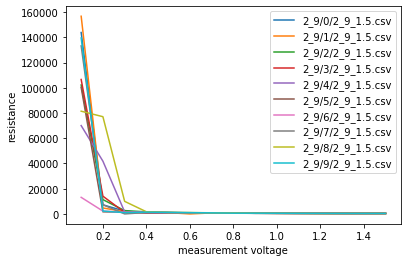

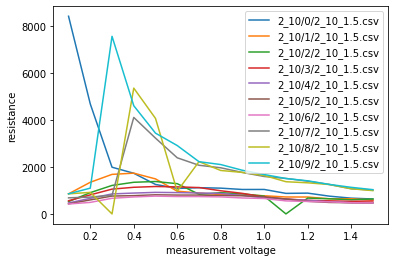

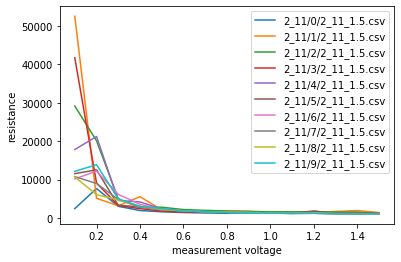

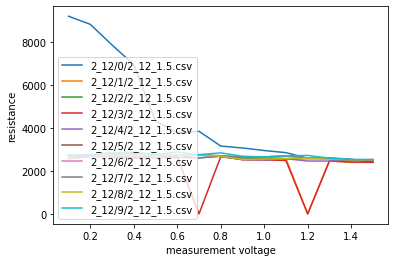

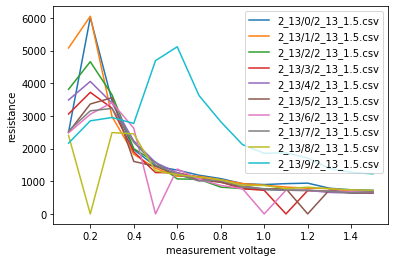

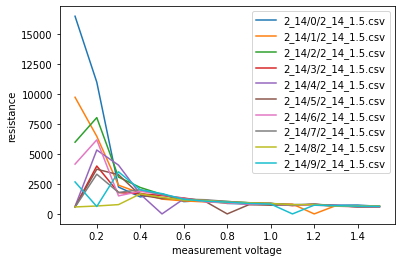

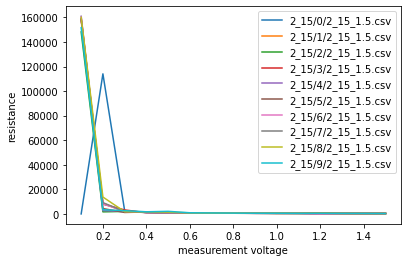

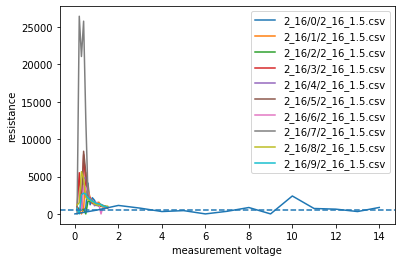

In [15]:
import numpy as np

MAX_MV = 1.6
MIN_MV = 0.1
STEP_MV = 0.1

mins = []

def plot_cell(cell = CELL):
    plt.ylabel("resistance")
    plt.xlabel("measurement voltage")
    minimum = 0
    for time in range(TIMES):
        vs = []
        rs = []
        for i in np.arange(MIN_MV, MAX_MV, STEP_MV):
            vs.append(i)
            filename = gen_filename(i, time, cell)
            rs.append(get_avg_resistance(filename))
            minimum = get_minimum(filename, minimum)
        plt.plot(vs, rs, label=filename)
        plt.legend()
    print("minimum is ", minimum, " for cell ", cell)
    mins.append(minimum)

def ad_plot(num):
    plt.figure()
    plot_cell(num)
#     plt.figure()
#     axes = plt.gca()
#     axes.set_ylim([0,3000])
#     plot_cell(num)
        
for num in range(1, 17):
    if (num == 3):
        continue
    ad_plot(num)
plt.plot(list(range(len(mins))), mins)
plt.axhline(y=500, linestyle="dashed")
# ad_plot(2)